In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data_Files/06_03/conjoint-py.csv')

In [3]:
data.head()

,Rank,P1,P2,U1,U2,D1,D2,D3
0,7,1,0,1,0,1,0,0
1,6,1,0,0,1,1,0,0
2,8,0,1,1,0,1,0,0
3,1,0,1,0,1,1,0,0
4,10,1,0,1,0,0,1,0


This actually shows a bunch of aggregates

In [5]:
names = {'Rank':"Rank", 
            "P1": "PhotoF1", 
            "P2": "PhotoF2", 
            "U1": "Ux1",
            "U2": "Ux2", 
            "D1": "SpecialSauce1", 
            "D2": "SpecialSauce2", 
            "D3": "SpecialSauce3"
            }

In [7]:
data.rename(columns = names, inplace=True)

In [9]:
data.head()

,Rank,PhotoF1,PhotoF2,Ux1,Ux2,SpecialSauce1,SpecialSauce2,SpecialSauce3
0,7,1,0,1,0,1,0,0
1,6,1,0,0,1,1,0,0
2,8,0,1,1,0,1,0,0
3,1,0,1,0,1,1,0,0
4,10,1,0,1,0,0,1,0


In [10]:
X = data[['PhotoF1', 'PhotoF2', 'Ux1', 'Ux2', 'SpecialSauce1', 'SpecialSauce2', 'SpecialSauce3']]
X = sm.add_constant(X)


y = data['Rank']





In [11]:
# Perform a linear regression
conjoint_regression = sm.OLS(y, X).fit()
conjoint_regression.summary()

c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4.232
Date:                Fri, 10 Feb 2023   Prob (F-statistic):             0.0471
Time:                        11:51:20   Log-Likelihood:                -24.520
No. Observations:                  12   AIC:                             59.04
Df Residuals:                       7   BIC:                             61.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7857      0.302      9.211      0.000       2.071       3.501
PhotoF1           2.7262      0.722      3.777      0.007       1.020       4.433
PhotoF2           0.0595      0.722      0.082      0.937      -1.647       1.766
Ux1               3.0595      0.722      4.239      0.004       1.353       4.766
Ux2              -0.2738      0.722     -0.379      0.716      -1.980       1.433
SpecialSauce1    -0.0714      1.003     -0.071      0.945      -2.443       2.301
SpecialSauce2    -0.8214      1.003     -0.819      0.440      -3.193       1.551
SpecialSauce3     3.6786      1.003      3.667      0.008       1.307       6.051
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.685
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.660
Skew:                           0.092   Prob(JB):                        0.719
Kurtosis:                       1.866   Cond. No.                     6.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

SpecialSauce3, Ux1, and PhotoF1 are the highest Coefs, and have the highest impact

In [12]:
raw = [3.67, 3.05, 2.72]
norm = [float(i)/sum(raw) for i in raw]
norm


[0.388771186440678, 0.323093220338983, 0.288135593220339]

(-1.1147511674392567,
 1.1127916250115144,
 -1.2114224402598486,
 1.1252953512104866)

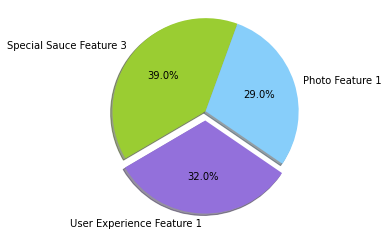

In [14]:
# Create a pie chart from the inputs

labels = 'Special Sauce Feature 3', 'User Experience Feature 1', 'Photo Feature 1'
sizes = [39, 32, 29]
colors = ['yellowgreen', 'mediumpurple', 'lightskyblue']
explode = (0, 0.1, 0)
plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=70)

plt.axis('equal')